In [2]:
import numpy as np

class KNearestNeighbor:
    def __init__(self, k):
        self.k = k # number of neighbors to take into account

    def train(self, X, y):
        self.X_train = X # point
        self.y_train = y # label

    def predict(self, X_test, num_loops=0):
        if num_loops == 0:
            distances = self.compute_distance_vectorized(X_test)

        elif num_loops == 1:
            distances = self.compute_distance_one_loop(X_test)

        else:
            distances = self.compute_distance_two_loops(X_test)

        return self.predict_labels(distances)

    def compute_distance_two_loops(self, X_test):
        #Inefficient implementation
        
        num_test = X_test.shape[0]
        num_train = self.X_train.shape[0]
        distances = np.zeros((num_test, num_train))

        for i in range(num_test):
            for j in range(num_train):
                distances[i, j] = np.sqrt(np.sum((X_test[i, :] - self.X_train[j, :]) ** 2))

        return distances

    def compute_distance_one_loop(self, X_test):
        # Also inneficient, utilize Numpy broadcasting in X_train - X_test[i,:]
        
        num_test = X_test.shape[0]
        num_train = self.X_train.shape[0]
        distances = np.zeros((num_test, num_train))

        for i in range(num_test):
            distances[i, :] = np.sqrt(np.sum((self.X_train - X_test[i, :]) ** 2, axis=1))

        return distances

    def compute_distance_vectorized(self, X_test):
        # Efficient 
        # ||u - v||² = ||u||² + ||v||² - 2uv
        
        X_test_squared = np.sum(X_test ** 2, axis=1, keepdims=True)
        X_train_squared = np.sum(self.X_train ** 2, axis=1, keepdims=True)
        two_X_test_X_train = np.dot(X_test, self.X_train.T)
        
        return np.sqrt(X_test_squared - 2 * two_X_test_X_train + X_train_squared.T)

    def predict_labels(self, distances):
        num_test = distances.shape[0]
        y_pred = np.zeros(num_test)

        for i in range(num_test):
            y_indices = np.argsort(distances[i, :])
            k_closest_classes = self.y_train[y_indices[: self.k]].astype(int)
            y_pred[i] = np.argmax(np.bincount(k_closest_classes))

        return y_pred

X_train = np.loadtxt("data.txt", delimiter=",")
y_train = np.loadtxt("targets.txt")

X_test = np.array([[1, 1], [3, 1], [1, 4], [2, 4], [3, 3], [5, 1]])

KNN = KNearestNeighbor(k=1)
KNN.train(X_train, y_train)

print(KNN.predict(X_test))

[1. 2. 2. 2. 2. 2.]


# Assigment by the 8th of March

Plot the training data with different colors depending on the label
Plot the X to be tested with 'o' markers

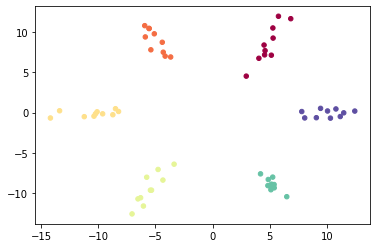

In [6]:
import matplotlib.pyplot as plt

def create_dataset_circle(N, D=2, K=5):
    X = np.zeros((N * K, D))  # data matrix (each row = single example)
    y = np.zeros(N * K)  # class labels

    for j in range(K):
        ix = range(N * j, N * (j + 1))
        r = 10 + np.random.randn(N) * 2 # radius
        t = (2*np.pi / K ) * (j+1) + np.random.randn(N) * 0.05 # theta
                
        X[ix] = np.c_[r*np.cos(t), r*np.sin(t)]
        y[ix] = j

    # lets visualize the data:
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap=plt.cm.Spectral)
    plt.show()

    return X, y

np.random.seed(1)
X, y = create_dataset_circle(N=10, K=6)

# Assigment by the 8th of March

Implement a function in python such that takes as an input a vector X_test to clasify it.

The function must implement three metrics;namely, Manhantan distance, Euclidian distance, and dot product between unit vectors (to determine directions or angles).

Generate X_test with the provided function create_dataset_circle, and use the data from data.txt and target.txt